# Przykład 1 (liczenie gradientu)

In [2]:
import tensorflow as tf
import math


image.png

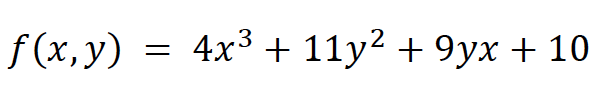


In [4]:
x = tf.Variable(1.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
    f = 4*(x**3)+11*(y**2)+9*y*x+10                         
    df_dx,df_dy = tape.gradient(f,(x,y))

print(df_dx.numpy())
print(df_dy.numpy())

30.0
53.0


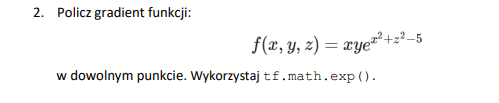

In [5]:
x = tf.Variable(1.0)
y = tf.Variable(2.0)
z = tf.Variable(3.0)

with tf.GradientTape() as tape:
    f = x*y*tf.math.exp((x**2)+(z**2)-5)                     
    df_dx,df_dy,df_dz = tape.gradient(f,(x,y,z))

print(df_dx.numpy())
print(df_dy.numpy())
print(df_dz.numpy())

890.479
148.41316
1780.958


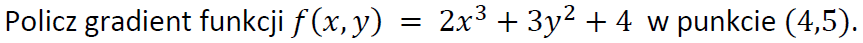

In [ ]:
x = tf.Variable(4.0)
y = tf.Variable(5.0)

with tf.GradientTape() as tape:
    f = 2*(x**3)+3*(y**2)+4                         
    df_dx,df_dy = tape.gradient(f,(x,y))

print(df_dx.numpy())
print(df_dy.numpy())

96.0
30.0


# Przykład 2 (regresja liniowa - liczenie gradientów)

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

Wygenrujemy **zbiór danych** złożony z 1000 punktów.

In [ ]:
number_of_points = 1000
x_point = []
y_point = []

In [ ]:
a = 0.22
b = 0.78

In [ ]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

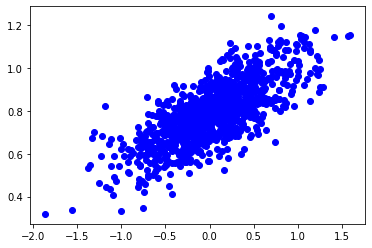

In [ ]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [ ]:
real_x = np.array(x_point)
real_y = np.array(y_point)

Definicja błędu:

In [ ]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

Defincje parametrów modelu:

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

Pętla treningowa:

In [ ]:
Loss = []
epochs = 50

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(dloss_da * 0.1)  #a = a - alpha*dloss_da
  b.assign_sub(dloss_db * 0.1)  #b = b - alpha*dloss_db

In [ ]:
np.max(Loss),np.min(Loss)

(0.591225, 0.009728576)

In [ ]:
print(a.numpy())
print(b.numpy())

0.25283825
0.78313136


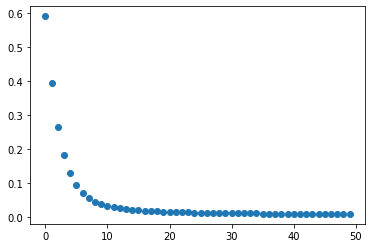

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [ ]:
max = np.max(x_point)
min = np.min(x_point)

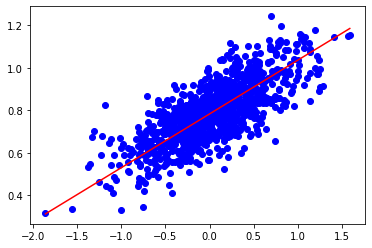

In [ ]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

# Przykład 3 (regresja liniowa - Keras)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Definiujemy model:

In [ ]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [ ]:
model.add(Dense(units = 1, use_bias=True, input_dim=1, activation = "linear"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

Kompilacja modelu:

In [ ]:
model.compile(loss='MSE',optimizer=opt)

Informacje o modelu:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Ustalamy **liczbę epok** w czasie której **model będzie uczony**.

In [ ]:
number_epochs=100

Proces **uczenia**:

In [ ]:
h = model.fit(real_x,real_y, verbose=0, epochs=number_epochs, batch_size=1000)

In [ ]:
Loss = h.history['loss']

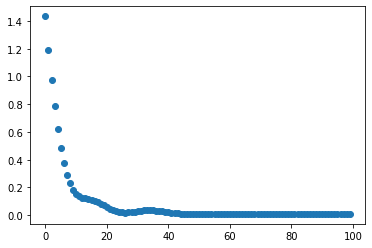

In [ ]:
plt.scatter(np.arange(number_epochs),Loss)
plt.show()

Sprawdźmy jakie są **wartości wag**:

In [ ]:
weights = model.get_weights()

a = weights[0][0][0]
b = weights[1][0]    #bias

a,b

(0.21286671, 0.7843723)

In [ ]:
max = np.max(x_point)
min = np.min(x_point)

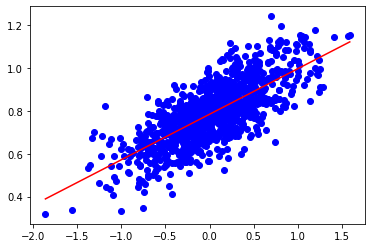

In [ ]:
X = np.linspace(min, max, num=10)
plt.plot(X,a*X+b,c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

# Przykład 4 (regresja logistyczna - liczenie gradientów)

Zbiór danych:

In [ ]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))

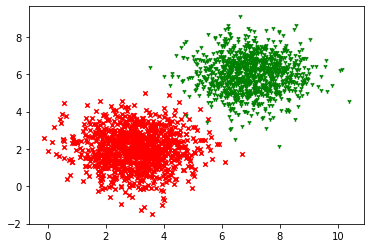

In [ ]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

Definiujemy funkcję błędu (entropia krzyżowa):

In [ ]:
def loss_fn(label, label_model):
    return tf.reduce_mean(-label*tf.math.log(label_model)-(1-label)*tf.math.log(1-label_model))

Parametry modelu:

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

Pętla treningowa:

In [ ]:
Loss = []
epochs = 2000
lr = 0.01
for _ in range(epochs):
  with tf.GradientTape() as tape:
    labels_model = tf.sigmoid(a*xs + b*ys + c)
    
    loss = loss_fn(labels, labels_model)
    Loss.append(loss.numpy())

  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b, c))

  a.assign_sub(lr*dloss_da)
  b.assign_sub(lr*dloss_db)
  c.assign_sub(lr*dloss_dc)

In [ ]:
np.max(Loss),np.min(Loss)

(1.6281917, 0.2704596)

In [ ]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

0.066904806
0.6465953
-2.3964617


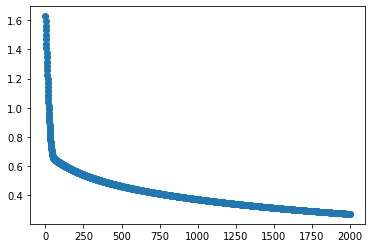

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

Sprawdzamy dla pewnego punktu:

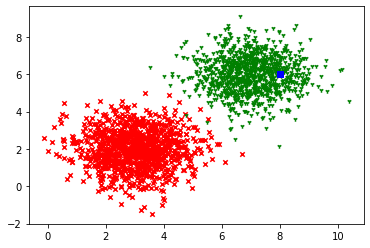

In [ ]:
x=8.0
y=6.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

In [ ]:
tf.sigmoid(a*x + b*y + c).numpy()

0.88271016

# Przykład 5 (regresja logistyczna - Keras)

Zbiór danych:

In [ ]:
#zbiór czerowny
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 

#zbiór zielony
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 

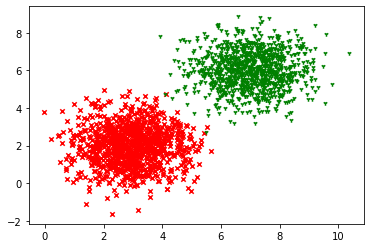

In [ ]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

Zbiór treningowy złożony jest z punktów:

In [ ]:
xs = xs.reshape(-1,1)
ys = ys.reshape(-1,1)
data_points = np.concatenate([xs,ys],axis=1)
data_points

array([[4.23180975, 1.27678361],
       [3.1130874 , 1.82685369],
       [3.43721149, 2.27312344],
       ...,
       [7.16662088, 5.66389408],
       [7.23060064, 5.18849971],
       [6.88645332, 4.64757478]])

Wartości oczekiwane: **0** dla zbioru **czerwonego**,**1** dla zbioru **zielonego**.

In [ ]:
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
data_points.shape,labels.shape

((2000, 2), (2000,))

Definiujemy model:

In [ ]:
model = Sequential()
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Pętla ucząca:

In [ ]:
epochs = 1000
h = model.fit(data_points,labels, verbose=0, epochs=epochs, batch_size=100)

In [ ]:
Loss = h.history['loss']

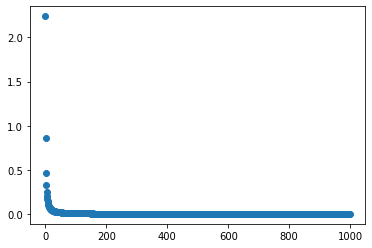

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

Sprawdzamy dla punktu o współrzędnych:

In [ ]:
x=7.0
y=6.0 

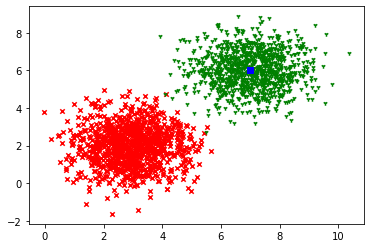

In [ ]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

In [ ]:
model.predict([[x,y]])

array([[1.]], dtype=float32)